In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Dataset shape: {X.shape}")
print(f"Target classes: {np.unique(y)}")
print(f"Class names: {data.target_names}")

Dataset shape: (569, 30)
Target classes: [0 1]
Class names: ['malignant' 'benign']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)

##### Calculate metrics manually

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.9708


In [11]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9640


In [12]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9907


In [13]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9772


##### Classification report

In [15]:
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



##### Confusion Matrix

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 59   4]
 [  1 107]]


##### K-Fold Cross-Validation (K = 5)

In [17]:
from sklearn.model_selection import cross_val_score
print("\n=== Metrics with Cross-Validation ===")


=== Metrics with Cross-Validation ===


In [18]:
cv_accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")

CV Accuracy: 0.9561 ± 0.0228


In [19]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
print(f"CV Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"CV Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"CV F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

CV Precision: 0.9590 ± 0.0251
CV Recall: 0.9719 ± 0.0219
CV F1 Score: 0.9652 ± 0.0183


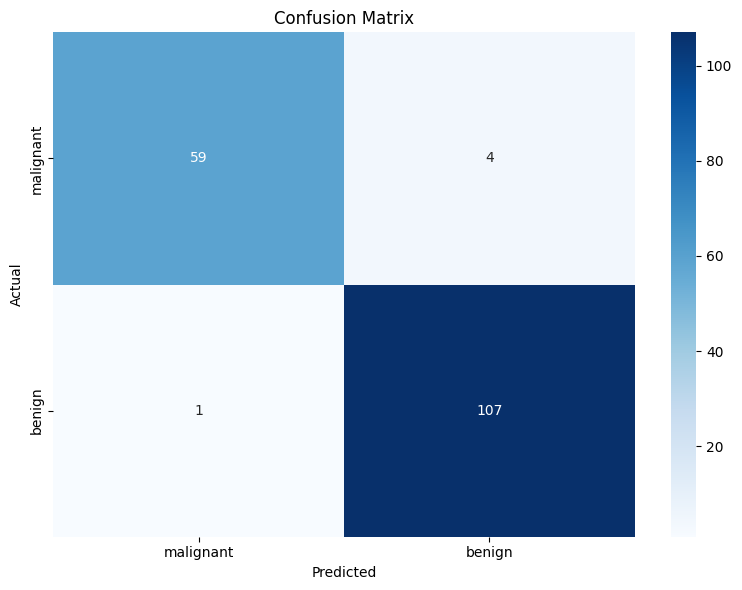

In [22]:
# visualise the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=data.target_names,
yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [23]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [24]:
threshold = 0.7
y_pred_high_threshold = (y_scores >= threshold).astype(int)
print("\n=== Custom Threshold (0.7) ===")
print("Classification Report with Higher Threshold:")
print(classification_report(y_test, y_pred_high_threshold,
target_names=data.target_names))


=== Custom Threshold (0.7) ===
Classification Report with Higher Threshold:
              precision    recall  f1-score   support

   malignant       0.91      0.98      0.95        63
      benign       0.99      0.94      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [27]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

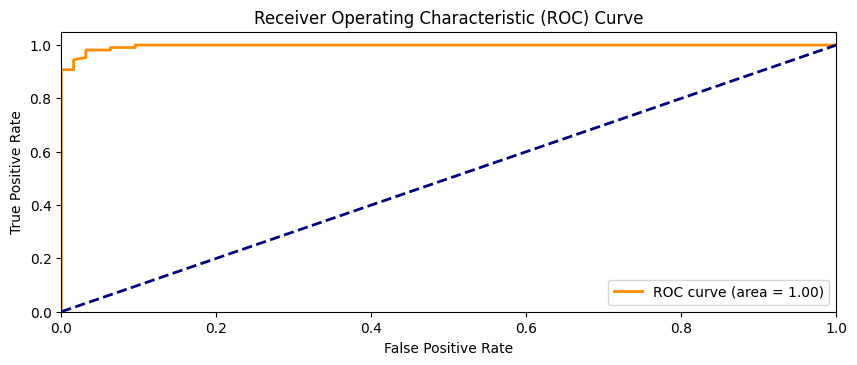

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

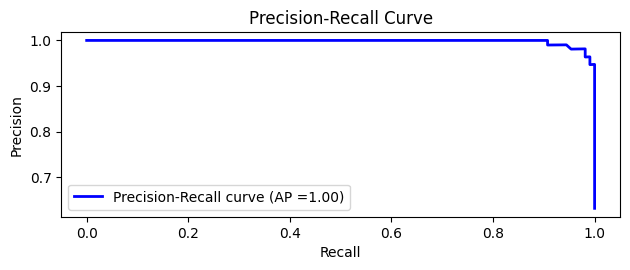

In [30]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)
plt.subplot(2, 1, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP ={avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()